In [1]:
import sys
sys.path.append("/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMe/python_analysis/analysisTools")
from analysisImports import *
setLibParams()

cfgDir = "/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMe/python_analysis/configs/"
plt.style.use(cfgDir+'plt_settings.mplstyle')

In [2]:
importlib.reload(aTools)
importlib.reload(subroutines)
az = aTools.Analyzer(cfgDir+'sample_configs/signal_aEM.json',cfgDir+'histo_configs/histoList.json',cfgDir+'histo_configs/histoPlotConfig.json')
fileset = az.sample_locs
samples = az.sample_names
sample_info = az.sample_info
histos = az.histos

samp = samples[0]
sample_info = {k:v for k,v in sample_info.items() if k == samp}
fileset = {k:v for k,v in fileset.items() if k == samp}
samples = [samp]

In [3]:
proc = aTools.iDMeProcessor(samples,sample_info,fileset,histos)
out = processor.run_uproot_job(fileset,
                              treename='ntuples/outT',
                              processor_instance=proc,
                              executor=processor.iterative_executor,
                              executor_args={
                                  "schema":NanoAODSchema
                              })

Preprocessing:   0%|          | 0/10 [00:00<?, ?file/s]

Processing:   0%|          | 0/10 [00:00<?, ?chunk/s]

/uscms_data/d3/sbrightt/miniconda3/envs/coffea/lib/python3.8/site-packages/coffea/hist/plot.py:333: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)


(0.0, 20.0)

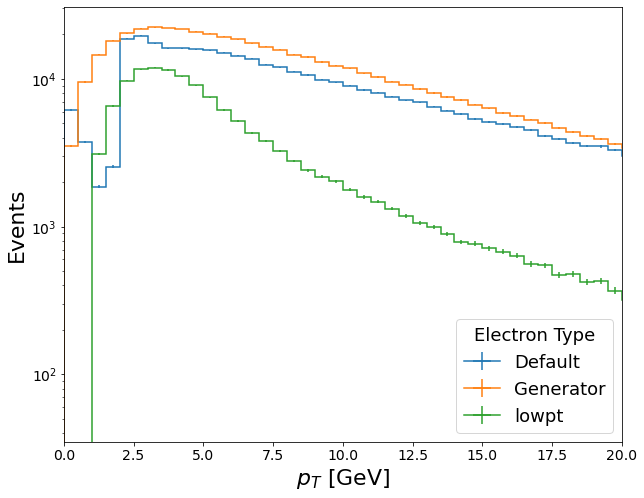

In [4]:
e_kin = out['ele_kinematics']
plt.figure(figsize=(10,8))
plt.yscale('log')
hist.plot1d(e_kin.sum('sample','eta','phi',overflow='all'))
plt.xlim([0,20])